In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pycaret
from pycaret.classification import *

In [2]:
train = pd.read_csv('train.csv')
train

,DATETIMEDATA,PM25,PM10,O3,CO,NO2,SO2,WS,TEMP,RH,WD
0,2024-01-01 00:00:00,11.5,20.0,23.00,0.20,1.00,0.00,2,28.0,86,15
1,2024-01-01 01:00:00,11.2,18.0,22.00,0.27,2.00,0.00,2,27.0,88,352
2,2024-01-01 02:00:00,9.8,17.0,19.00,0.26,3.00,0.00,2,27.0,90,348
3,2024-01-01 03:00:00,9.7,17.0,17.00,0.26,2.00,0.00,2,26.0,91,1
4,2024-01-01 04:00:00,8.7,16.0,17.00,0.26,2.00,0.00,2,27.0,90,3
...,...,...,...,...,...,...,...,...,...,...,...
1138,2024-02-18 06:00:00,15.6,32.0,14.00,0.05,3.00,0.00,1,25.0,85,30
1139,2024-02-18 07:00:00,17.7,37.0,7.00,0.07,2.29,0.00,0,25.0,84,274
1140,2024-02-18 08:00:00,21.4,48.0,18.00,0.20,2.00,0.14,2,29.0,64,56
1141,2024-02-18 09:00:00,16.3,41.0,22.88,0.16,1.00,0.00,4,31.0,57,60


In [3]:
test = pd.read_csv('test.csv')
test

,DATETIMEDATA,PM25,PM10,O3,CO,NO2,SO2,WS,TEMP,RH,WD
0,2024-02-18 11:00:00,15.9,32.0,24.0,0.13,1.0,0.0,5,33.0,53,48
1,2024-02-18 12:00:00,12.6,33.0,27.0,0.14,1.0,0.0,5,33.0,51,49
2,2024-02-18 13:00:00,10.1,39.0,27.0,0.13,1.0,0.0,4,34.0,50,49
3,2024-02-18 14:00:00,8.7,34.0,28.0,0.13,1.0,0.0,5,33.0,51,52
4,2024-02-18 15:00:00,12.1,32.0,23.0,0.14,1.0,0.0,6,33.0,55,56
...,...,...,...,...,...,...,...,...,...,...,...
486,2024-03-09 17:00:00,8.6,25.0,20.0,0.08,1.0,0.0,4,31.0,62,61
487,2024-03-09 18:00:00,7.4,23.0,16.0,0.09,2.0,0.0,3,30.0,68,47
488,2024-03-09 19:00:00,6.5,22.0,13.0,0.11,3.0,0.0,2,29.0,73,39
489,2024-03-09 20:00:00,6.6,22.0,12.0,0.12,3.0,0.0,2,28.0,77,32


In [4]:
from pycaret.regression import *
train['DATETIMEDATA'] = pd.to_datetime(train['DATETIMEDATA'])

In [5]:
train = train.drop(columns=['PM10','CO','NO2','SO2'])
regression_setup = setup(train, target='PM25', session_id=123, date_features=['DATETIMEDATA'], normalize=True)
best = compare_models()
et_model = create_model('et')

,Description,Value
0,Session id,123
1,Target,PM25
2,Target type,Regression
3,Original data shape,"(1143, 7)"
4,Transformed data shape,"(1143, 9)"
5,Transformed train set shape,"(800, 9)"
6,Transformed test set shape,"(343, 9)"
7,Numeric features,5
8,Date features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3.9426,27.3996,5.2135,0.4639,0.2801,0.2548,0.0440
et,Extra Trees Regressor,3.9654,28.3052,5.2921,0.4458,0.2889,0.2609,0.0350
lightgbm,Light Gradient Boosting Machine,4.0579,28.8400,5.3564,0.4338,0.2898,0.2604,0.1540
gbr,Gradient Boosting Regressor,4.1287,29.1850,5.3781,0.4305,0.2934,0.2714,0.0160
knn,K Neighbors Regressor,4.4119,34.8469,5.8755,0.3172,0.3167,0.2902,0.0110
ada,AdaBoost Regressor,5.3046,41.5516,6.4376,0.1812,0.3762,0.4004,0.0150
br,Bayesian Ridge,5.0990,42.2807,6.4893,0.1700,0.3567,0.3461,0.0070
ridge,Ridge Regression,5.1031,42.4061,6.5001,0.1666,0.3605,0.3462,0.0060
lar,Least Angle Regression,5.1044,42.4426,6.5031,0.1657,0.3587,0.3462,0.0070
lr,Linear Regression,5.1044,42.4426,6.5031,0.1657,0.3587,0.3462,0.2850


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.9482,27.8149,5.2740,0.4710,0.3031,0.2737
1,3.4780,21.7702,4.6659,0.4740,0.2638,0.2282
2,4.0591,29.2854,5.4116,0.3947,0.2762,0.2469
3,3.3130,18.2779,4.2753,0.5747,0.2623,0.2418
4,4.1158,40.2043,6.3407,0.1926,0.3455,0.2949
5,4.3981,35.2753,5.9393,0.4140,0.3163,0.2955
6,4.2265,27.7333,5.2662,0.4709,0.2838,0.2744
7,3.7766,26.4033,5.1384,0.4889,0.2655,0.2277
8,4.1136,28.1998,5.3104,0.5463,0.2797,0.2477


In [6]:
tuned_et_model = tune_model(et_model)
bagged_model = ensemble_model(tuned_et_model, n_estimators=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.3313,31.7017,5.6304,0.3970,0.3079,0.2832
1,4.2640,27.1962,5.2150,0.3429,0.3108,0.3069
2,4.3512,31.4657,5.6094,0.3496,0.3016,0.2768
3,4.0309,25.7550,5.0749,0.4008,0.3168,0.3060
4,4.6300,39.9238,6.3185,0.1982,0.3600,0.3439
5,4.6633,39.6155,6.2941,0.3419,0.3223,0.3112
6,4.8357,35.0453,5.9199,0.3314,0.3347,0.3348
7,4.5727,33.7116,5.8062,0.3475,0.3025,0.2838
8,4.9090,37.4185,6.1171,0.3980,0.3178,0.2961


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.1352,29.0400,5.3889,0.4477,0.3066,0.2823
1,3.6507,21.6770,4.6559,0.4763,0.2694,0.2486
2,4.0554,27.9722,5.2889,0.4218,0.2755,0.2503
3,3.4421,18.8469,4.3413,0.5615,0.2702,0.2539
4,4.2013,37.8704,6.1539,0.2395,0.3405,0.3067
5,4.5388,36.5509,6.0457,0.3929,0.3166,0.3056
6,4.3559,29.5445,5.4355,0.4364,0.3042,0.2965
7,4.0120,27.1761,5.2131,0.4740,0.2690,0.2437
8,4.3524,30.5121,5.5238,0.5091,0.2905,0.2620


In [18]:
# train['DATETIMEDATA'] = pd.to_datetime(train['DATETIMEDATA'])
# train['DATETIMEDATA'] = train['DATETIMEDATA'].dt.date

start_date = pd.Timestamp.now()
end_date = start_date + pd.DateOffset(days=7)
future_dates = pd.date_range(start=start_date, end=end_date, freq='D')

In [19]:
future_data = pd.DataFrame({'DATETIMEDATA': future_dates})
future_data['O3'] = 0
future_data['WS'] = 0
future_data['TEMP'] = 0
future_data['RH'] = 0
future_data['WD'] = 0

In [20]:
predictions = predict_model(bagged_model, data=future_data)
mpdf = pd.DataFrame(predictions, columns=['DATETIMEDATA', 'prediction_label'])
print(mpdf)

                DATETIMEDATA  prediction_label
0 2024-03-09 23:12:54.360511         19.390700
1 2024-03-10 23:12:54.360511         19.234750
2 2024-03-11 23:12:54.360511         19.105592
3 2024-03-12 23:12:54.360511         19.114317
4 2024-03-13 23:12:54.360511         19.019200
5 2024-03-14 23:12:54.360511         18.660950
6 2024-03-15 23:12:54.360511         18.297450
7 2024-03-16 23:12:54.360511         18.344150


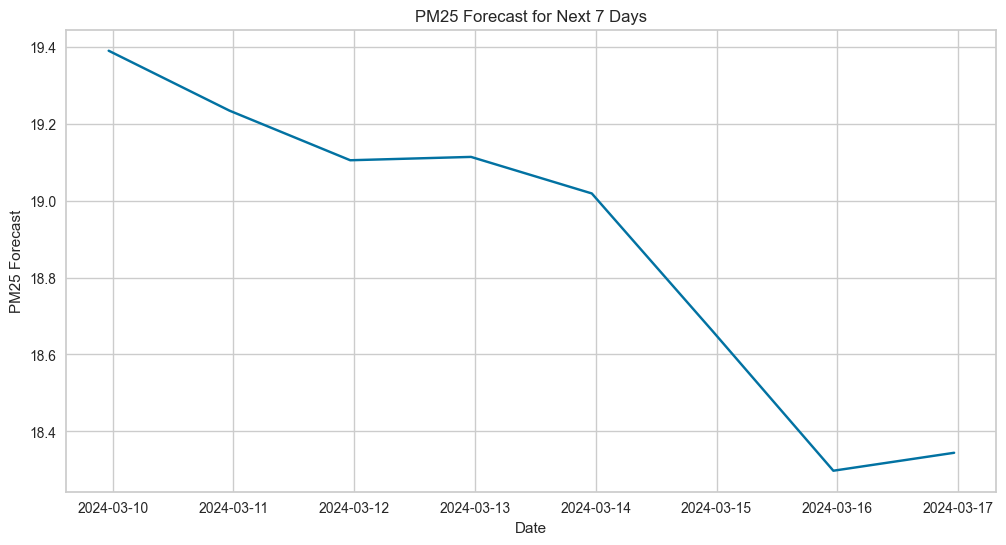

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(future_dates, predictions['prediction_label'])
plt.xlabel('Date')
plt.ylabel('PM25 Forecast')
plt.title('PM25 Forecast for Next 7 Days')
plt.grid(True)
plt.show()